<a href="https://colab.research.google.com/github/TiagoHarari/DataAnalysis_course/blob/main/3-Agrupacion_groupby_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/3_Agrupacion_y_Agregacion/ejercicio/ejercicio.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

## Parte A
Para esta parte vamos a trabajar sobre el mismo DataFrame que usamos en clase pero agrupando a nivel de comunidad autónoma (Cod_CCAA). En este caso vamos a traer también las descripciones y vamos a hacer un join para formar un único data set.

In [2]:
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/3_Agrupacion_y_Agregacion/parodesprov.csv')

In [4]:
df_descripciones = pd.read_csv('https://storage.googleapis.com/humai-datasets/aws_s3/analisis_de_datos/3_Agrupacion_y_Agregacion/ejercicios/comunidades_descripcion.csv')

Unan ambos DataFrames utilizando la función pd.merge()

In [5]:
df.head()

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop
0,1,1001,Alegría-Dulantzi,1,16,184.0,2856.0,Araba/Álava,16.0,3.709269e+07,48191.568537,1.0
1,2,1002,Amurrio,1,16,766.0,10260.0,Araba/Álava,16.0,1.799114e+08,90623.621986,1.0
2,3,1003,Aramaio,1,16,18.0,1502.0,Araba/Álava,16.0,1.377066e+08,58592.914048,1.0
3,4,1004,Artziniega,1,16,110.0,1840.0,Araba/Álava,16.0,5.130078e+07,31498.524044,1.0
4,5,1006,Armiñón,1,16,12.0,234.0,Araba/Álava,16.0,2.380288e+07,33293.805036,1.0


In [6]:
df_descripciones.head()

,Código,Literal
0,1,Andalucía
1,2,Aragón
2,3,"Asturias, Principado de"
3,4,"Balears, Illes"
4,5,Canarias


In [7]:
# agrupamos con merge a comunidad autonoma
df_final = pd.merge(df, df_descripciones, left_on="Cod_CCAA", right_on="Código")
df_final.head()
# unimos los dos dataframes y que se unan en las columnas de comunidad autonoma con el codigo

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop,Código,Literal
0,1,1001,Alegría-Dulantzi,1,16,184.0,2856.0,Araba/Álava,16.0,3.709269e+07,48191.568537,1.0,16,País Vasco
1,2,1002,Amurrio,1,16,766.0,10260.0,Araba/Álava,16.0,1.799114e+08,90623.621986,1.0,16,País Vasco
2,3,1003,Aramaio,1,16,18.0,1502.0,Araba/Álava,16.0,1.377066e+08,58592.914048,1.0,16,País Vasco
3,4,1004,Artziniega,1,16,110.0,1840.0,Araba/Álava,16.0,5.130078e+07,31498.524044,1.0,16,País Vasco
4,5,1006,Armiñón,1,16,12.0,234.0,Araba/Álava,16.0,2.380288e+07,33293.805036,1.0,16,País Vasco


Construir el DataFrame de comunidades autónomas, incluyendo la densidad, la proporción de paro y la cantidad de municipios.

In [8]:
df_CCAA = df_final.groupby("Cod_CCAA").aggregate({
    'Literal': 'first',
    'PAD_1C02': 'sum',
    'Shape__Area': 'sum',
    'TotalParoRegistrado': 'sum',
    'Codigo': 'count'
})
# renombramos las columnas
df_CCAA = df_CCAA.rename(columns={'Codigo': 'CantMunicipios', 'Literal': 'Nombre_CCAA'})

df_CCAA.head()

,Nombre_CCAA,PAD_1C02,Shape__Area,TotalParoRegistrado,CantMunicipios
Cod_CCAA,,,,,
1,Andalucía,16767927.0,2.786058e+11,1786171.0,1556
2,Aragón,2617313.0,1.704497e+11,162412.0,1462
3,"Asturias, Principado de",2077568.0,4.004387e+10,172450.0,156
4,"Balears, Illes",2223219.0,1.679532e+10,131888.0,134
5,Canarias,4210045.0,1.924110e+10,462611.0,176


In [9]:
# densidad
df_CCAA["Densidad"] = df_CCAA["PAD_1C02"] / df_CCAA["Shape__Area"]
# agregamos la columna Densidad, al df_CCAA

In [10]:
# proporción de paro
df_CCAA["Proporcion_Paro"] = df_CCAA["TotalParoRegistrado"] / df_CCAA["PAD_1C02"]
# agregamos otra columna

In [11]:
# la cantidad de municipios
municipios = df_final["Texto"].unique()
municipios

array(['Alegría-Dulantzi', 'Amurrio', 'Aramaio', ..., 'Voto', 'Ceuta',
       'Melilla'], dtype=object)

Habíamos visto que el promedio de la proporción de paro en los municipios con una densidad menor a la mediana es más bajo.. ¿Se cumple lo mismo para las provincias?

In [12]:
# Densidad provincia
df_final['densidad'] = df_final['PAD_1C02'] / df_final['Shape__Area']

In [13]:
# Proporcion de paro provincia
df_final['proporcion_paro'] =  df_final['TotalParoRegistrado'] / df_final['PAD_1C02']

In [14]:
# Armamos el df por provincia
df_prov = df_final.groupby('Cod_Prov')[['densidad', 'proporcion_paro']].mean()
df_prov.head()

,densidad,proporcion_paro
Cod_Prov,,
1,0.000031,0.046115
2,0.000009,0.108226
3,0.000184,0.074466
4,0.000056,0.072556
5,0.000007,0.058510


In [15]:
# Proporcion de paro en provincias con densidad menor a la mediana
df_prov.query('densidad < densidad.median()')['proporcion_paro'].mean()

0.060666461283987144

In [16]:
# Proporcion de paro en provincias con densidad mayor a la mediana
df_prov.query('densidad >= densidad.median()')['proporcion_paro'].mean()

0.07860675470615039

¿Cuál es la comunidad autónoma con mayor cantidad de municipios?

In [17]:
df_final.groupby('Cod_CCAA')['Codigo'].nunique().sort_values(ascending=False)
# usamos unique para encontrar los valores unicos
# sort_values(de menor a mayor = Falso) para ordenar de mayor a menor

Cod_CCAA
7     2248
9      947
8      919
1      778
2      731
10     542
11     388
15     317
12     315
16     251
13     179
17     174
6      102
5       88
3       78
4       67
14      45
18       1
19       1
Name: Codigo, dtype: int64

## Parte B
Para esta parte de la práctica usaremos los datos abiertos de CABA, a partir de un relevamiento muestral de los avisos publicados para la venta de departamentos en el año 2020.

https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta

Proyecto de analisis de precios de departamentos de CABA.


In [18]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [19]:
path = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv'

df = pd.read_csv(path, encoding = "latin1", sep=",")

In [20]:
df.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5


Hacer un primer análisis del dataset y analizar nulos.

In [21]:
df.shape # base de datos de 10301 archivos y 10 columnas

(10301, 10)

In [22]:
# analisis de filas con valores nulos para determinar que hacer con esos valores en caso de que los haya
df.isnull().sum()

DIRECCION     6
PROPIEDADS    0
PRECIOUSD     0
PRECIOPESO    0
DOLARM2       0
PESOSM2       0
COTIZACION    0
TRIMESTRE_    0
BARRIO        0
COMUNA_       0
dtype: int64

In [23]:
# reducimos el df a una serie booleana que indique cuando hay valores nulos
df[df.isnull().any(axis=1)] # any() --> para reducir a boolean
# axis = 1 indica que aplicando la función de manera horizontal, probando todos los valores del eje y.

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
2256,NaN,323,1600000,102400000,4954,317028,64,SEGUNDO,NUÃEZ,13
2976,NaN,1100,3500000,224000000,3182,203636,64,SEGUNDO,VILLA CRESPO,15
3017,NaN,1050,520000,33280000,495,31695,64,SEGUNDO,VILLA CRESPO,15
3981,NaN,221,420000,26880000,1900,121629,64,SEGUNDO,PARQUE PATRICIOS,4
3985,NaN,128,350000,22400000,2734,175000,64,SEGUNDO,PARQUE PATRICIOS,4
4164,NaN,260,450000,28800000,1731,110769,64,SEGUNDO,VILLA LURO,10


esas 6 direcciones no tienen un valor asignado.


array([[<Axes: title={'center': 'PROPIEDADS'}>,
        <Axes: title={'center': 'PRECIOUSD'}>,
        <Axes: title={'center': 'PRECIOPESO'}>],
       [<Axes: title={'center': 'DOLARM2'}>,
        <Axes: title={'center': 'PESOSM2'}>,
        <Axes: title={'center': 'COTIZACION'}>],
       [<Axes: title={'center': 'COMUNA_'}>, <Axes: >, <Axes: >]],
      dtype=object)

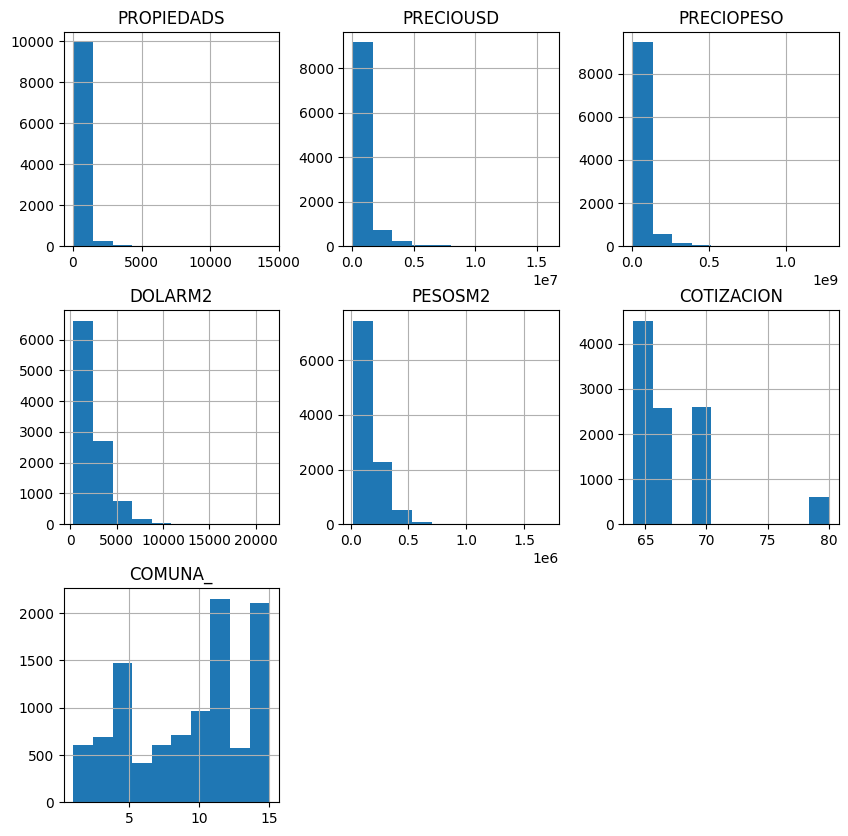

In [24]:
# para cada serie del df, resultamos en un histograma
df.hist(figsize=(10,10))

In [25]:
# como los trimestres aparecen como str, los vamos a cambiar
df['TRIMESTRE_'].unique()

array(['CUARTO', 'PRIMER', 'SEGUNDO', 'TERCER'], dtype=object)

In [26]:
# variable que almacene los reemplazos como un dict
reemplazos = {'PRIMER': 1, 'SEGUNDO': 2,'TERCER':3, 'CUARTO': 4}
df["TRIMESTRE_"] = df['TRIMESTRE_'].replace(reemplazos)

# visualizamos la columna con los cambios
df.TRIMESTRE_.unique()

array([4, 1, 2, 3])

**A continuacion elaboramos un histograma de los trimestres del dataframe**

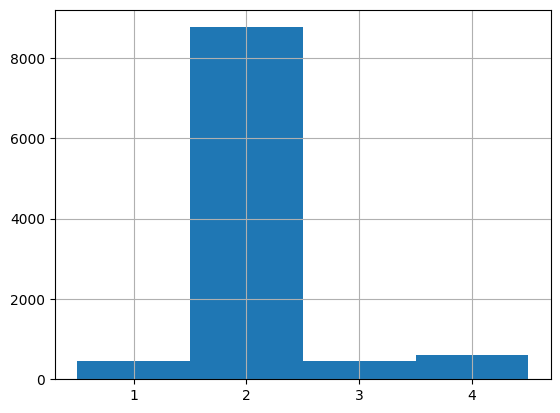

In [27]:
df["TRIMESTRE_"].hist(bins=[0.5, 1.5, 2.5, 3.5, 4.5]).set_xticks([1, 2, 3, 4])
# df["TRIMESTRE_"].hist --> crea un histograma
# bins=[0.5, 1.5, 2.5, 3.5, 4.5] --> Define los intervalos de las barras del histograma (ancho de la barra)
# set_xticks([1, 2, 3, 4]) --> define los valores del eje x

El muestreo principal fue durante el segundo trimestre del 2020, osea, entre 1 de abril hasta el 30 de junio.

In [28]:
df.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,4,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,4,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,4,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,4,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,4,ALMAGRO,5


### Ejercicio 1.
¿Cuál es el precio medio del metro cuadrado en la Ciudad de Buenos Aires?

In [29]:
# promedio de la columna DOLARM2
precio_medio_metro = df.DOLARM2.mean()

# imprimimos el resultado con dos decimales
print(f"el precio medio del metro cuadrado en CABA es {precio_medio_metro:.2f} dolares")

el precio medio del metro cuadrado en CABA es 2357.65 dolares


### Ejercicio 2.
a) Dividir las propiedades por cuartiles de precios en dólares.

In [30]:
# nueva columna que almacena los precios en usd dividios por 4 labels
df['CUARTIL'] = pd.qcut(df['PRECIOUSD'], 4, labels=["Q1", "Q2", "Q3", "Q4"])

In [31]:
df.CUARTIL.unique()

['Q1', 'Q2', 'Q4', 'Q3']
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']


b) ¿Cuáles son los barrios con más domicilios en venta dentro del cuartil más barato de CABA?

Usar pivot_table

*el objetivo es encontrar el BARRIO que mas PROPIEDADES tenga a la venta en un precio dentro del Q1*

In [32]:
tabla = pd.pivot_table(df,
    columns = "CUARTIL", # columnas
    index = 'BARRIO', # filas
    values = 'PROPIEDADS', # valores, cantidad de propiedades
    aggfunc = "count"
)

barrios_q1 = tabla['Q1'].sort_values(ascending=False)

print(f"el barrio con mas domicilios en venta dentro del cuartil mas barato es {barrios_q1.head()}")

el barrio con mas domicilios en venta dentro del cuartil mas barato es BARRIO
MATADEROS           171
PARQUE PATRICIOS    120
NUEVA POMPEYA       114
SAN CRISTOBAL       104
BOCA                104
Name: Q1, dtype: int64


¿Y usando groupby?

In [33]:
# agrupar por barrios y cuartiles y contar las direcciones que haya
agrupado = df.groupby(['BARRIO', 'CUARTIL'])['DIRECCION'].count()

# agrupamos por el cuartil uno, indexandolo y ordenando de menor a mayor
agrupado_q1 = agrupado.loc[:, 'Q1'].sort_values(ascending = False)

# imprimimos
print(f"la mayor cantidad de domicilios a la venta en el menor cuartil son {agrupado_q1.head()}")

la mayor cantidad de domicilios a la venta en el menor cuartil son BARRIO
MATADEROS           171
PARQUE PATRICIOS    119
NUEVA POMPEYA       114
SAN CRISTOBAL       104
BOCA                104
Name: DIRECCION, dtype: int64


¿Hay otra forma más sencilla?

In [34]:
# indexamos por cuartil == Q1 y barrio con sus valores contados
df[df['CUARTIL'] == 'Q1']['BARRIO'].value_counts().head()

BARRIO
MATADEROS           171
PARQUE PATRICIOS    120
NUEVA POMPEYA       114
BOCA                104
SAN CRISTOBAL       104
Name: count, dtype: int64

### Ejercicio 3.
¿Se puede calcular el tamaño de las propiedades?

¿Cuál sería el precio promedio de las propiedades para cada decil, según metros cuadrados?

In [35]:
df.sample(5)

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_,CUARTIL
5577,Suarez,256,170000,11815000,664,46152,70,2,BOCA,4,Q1
7900,Franklin entre Espinosa y Pujol,673,690000,46368000,1025,68897,67,2,CABALLITO,6,Q3
5881,Escalada Al 1700,170,160000,11120000,941,65412,70,2,MATADEROS,9,Q1
2174,Ciudad de la Paz,266,1200000,76800000,4511,288722,64,2,COLEGIALES,13,Q4
1581,LAFUENTE 161,492,745000,47493750,1514,96532,64,1,FLORES NORTE,7,Q3


In [36]:
df["tamanio_m2"] = df['PRECIOPESO'] / df['PESOSM2']
df.tamanio_m2.head()

0   189.99968
1   242.00018
2   210.99986
3   320.00000
4   250.00000
Name: tamanio_m2, dtype: float64

In [37]:
# ¿Cuál sería el precio promedio de las propiedades para cada decil, según metros cuadrados?

deciles = pd.qcut(df['tamanio_m2'], q=10) #divide a la columna tamanio_m2 en 10 con pd.qcut


# Calcular el precio promedio por metro cuadrado para cada decil de tamaño
precios_promedio_por_decil = df.groupby(deciles)['DOLARM2'].mean().reset_index().sort_values(by="tamanio_m2",ascending=True)

# precio promedio por deciles
precios_promedio_por_decil = precios_promedio_por_decil.rename(columns={'DOLARM2': 'precio_prom_m2'}) # renombramos la columna de DOLARM2

In [38]:
precios_promedio_por_decil["decil"] = range(1, 11)

In [39]:
precios_promedio_por_decil

,tamanio_m2,precio_prom_m2,decil
0,"(29.999, 148.001]",3042.19205,1
1,"(148.001, 180.001]",2637.23159,2
2,"(180.001, 217.0]",2706.39105,3
3,"(217.0, 250.0]",2459.63619,4
4,"(250.0, 291.0]",2435.20396,5
5,"(291.0, 339.0]",2204.71165,6
6,"(339.0, 390.002]",2037.20485,7
7,"(390.002, 492.998]",2069.82524,8
8,"(492.998, 834.009]",2114.02233,9
9,"(834.009, 14303.089]",1869.08447,10


**con la funcion pd.qcut, pudimos dividir a la columa en 10 deciles**

**El resultado es un DataFrame precios_promedio_por_decil que contiene los deciles de tamaño (TAMANIO_M2) y el precio promedio por metro cuadrado (precio_prom_m2) para cada decil**

<Axes: xlabel='decil'>

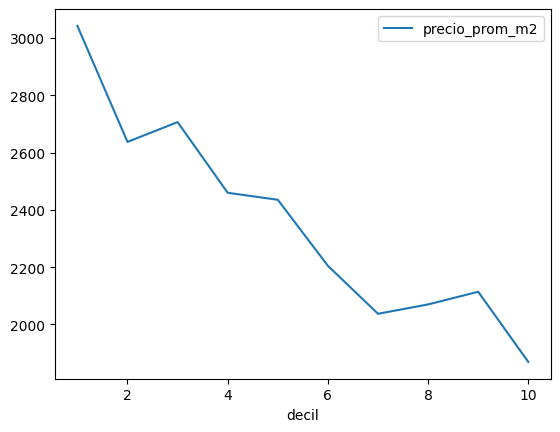

In [40]:
precios_promedio_por_decil.plot(x='decil', y='precio_prom_m2')

### Ejercicio 4.

¿Cuáles son los barrios más caros en términos de precios por metro cuadrado? ¿Y los más baratos?


In [41]:
df.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_,CUARTIL,tamanio_m2
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,4,ALMAGRO,5,Q1,189.99968
1,PRINGLES 100,242,230000,18400000,950,76033,80,4,ALMAGRO,5,Q1,242.00018
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,4,ALMAGRO,5,Q1,210.99986
3,MEXICO 4000,320,300000,24000000,938,75000,80,4,ALMAGRO,5,Q1,320.00000
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,4,ALMAGRO,5,Q1,250.00000


In [42]:
# calculamos el precio promedio en dolares de cada barrio
precio_promedio_por_barrio = df.groupby('BARRIO')['DOLARM2'].mean().reset_index()

# agrupamos por barrios y por una columna del promedio del dolar por m2

barrios_mas_caros = precio_promedio_por_barrio.sort_values(by ='DOLARM2', ascending=False)
print("Los barrios más caros en términos de precios por metro cuadrado son:")
print(barrios_mas_caros.head())


print("Los barrios más baratos en términos de precios por metro cuadrado son:")
print(barrios_mas_caros.tail())

Los barrios más caros en términos de precios por metro cuadrado son:
           BARRIO    DOLARM2
30       RECOLETA 5834.18750
31         RETIRO 5284.16667
29  PUERTO MADERO 4906.00000
5        BELGRANO 4302.16605
23        PALERMO 4283.04671
Los barrios más baratos en términos de precios por metro cuadrado son:
             BARRIO    DOLARM2
6              BOCA 1086.25764
43     VILLA LUGANO  908.55000
4    BARRACAS OESTE  742.00000
48  VILLA RIACHUELO  661.27027
50    VILLA SOLDATI  593.19048


### Ejercicio 5

Dado el siguiente DataFrame con departamentos en venta en CABA en 2019: https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta/resource/c9a6fed8-da1d-460e-92a8-e0213d68f59c

¿Qué porcentaje de propiedades que estaban en venta durante 2019 siguieron estando en 2020?

In [43]:
df_2019 = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2019.csv")

In [44]:
df_2019.head()

,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA
0,VTA,TERRENO,-34.6294378,-58.4498948,235.00000,Malvinas Argentinas al 400,45.00,1100000.00000,49500000,4681.00000,210645.00000,CABALLITO,6
1,VTA,TERRENO,-34.6289663,-58.4483573,1629.00000,Jose Bonifacio 1520,45.00,1400000.00000,63000000,859.00000,38655.00000,CABALLITO,6
2,VTA,TERRENO,-34.6265344,-58.4326234,438.00000,BONIFACIO JOSE 400,45.00,2380000.00000,107100000,1062.00000,47790.00000,CABALLITO,6
3,VTA,TERRENO,-34.6248406,-58.4317985,272.00000,VIEL al 600,45.00,895000.00000,40275000,3290.00000,148050.00000,CABALLITO,6
4,VTA,TERRENO,-34.622629,-58.44079,600.00000,Av. Del Barco Centenera 200,45.00,400000.00000,18000000,667.00000,30015.00000,CABALLITO,6


In [45]:
# obtenemos las operaciones

df_2019["OPERACION"].value_counts()

OPERACION
VTA    5002
ALQ       4
Name: count, dtype: int64

In [46]:
df_2019 = df_2019[df_2019["OPERACION"] == "VTA"]
df_2019.sample(5)


,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA
1827,VTA,TERRENO,-34.65184,-58.4836723,100.00000,Homero 1500,"37,5",230000.00000,8625000,2300.00000,86250.00000,PARQUE AVELLANEDA,9
250,VTA,TERRENO,-34.6034634,-58.4328514,310.00000,RIO DE JANEIRO al 1000,45.00,980000.00000,#VALUE!,3161.00000,142245.00000,CABALLITO,6
3608,VTA,TERRENO,"-34,573755","-58,452995",789.00000,ZAPIOLA 1000,"56,16",2600000.00000,146016000,3295.00000,185047.00000,COLEGIALES,13
1237,VTA,TERRENO,-34.5775159,-58.498022,3390.00000,Av de los Constituyentes 5200,41.40,1390000.00000,57546000,410.02950,16974.00000,VILLA PUEYRREDON,12
1959,VTA,TERRENO,-34.6022521,-58.4344461,205.00000,VERA al 100,"37,5",800000.00000,30000000,3902.00000,146325.00000,VILLA CRESPO,15


In [47]:
# ahora hacemos un merge de ambos dataframes con las columnas DIRECCION
merged_df = pd.merge(df_2019, df, how='inner', left_on="DIRECCION", right_on="DIRECCION")
# con esto obtenemos un df nuevo con las columnas direccion unidas de los dos df distintos

# Cálculo del porcentaje de propiedades que estaban en venta en 2019 y siguieron en 2020
variacion_vta = (len(merged_df)/len(df_2019)) * 100

# numerador ==> el df que contiene ambos anios con las ventas
# denominador ==> el df del periodo pasado (2019)

print(f"la variacion en terminos relativos de las ventas de departamentos fue de {variacion_vta}")

la variacion en terminos relativos de las ventas de departamentos fue de 46.30147940823671


¿Qué modificaciones habría que hacer para encontrar más coincidencias? ¿Qué consideraciones habría que tomar a la hora de analizar el resultado?

In [48]:
# Eliminamos nulos
df_2019 = df_2019[df_2019['DIRECCION'].notna()] # eliminamos las direcciones nulas
df = df[df['DIRECCION'].notna()] # eliminamos las direcciones nulas

# Función para estandarizar las direcciones
def standardize_address(address):
    return address.strip().upper()

# Aplicar la función de estandarización a las direcciones en ambos DataFrames
df_2019['DIRECCION'] = df_2019['DIRECCION'].apply(standardize_address)
df['DIRECCION'] = df['DIRECCION'].apply(standardize_address)

<ipython-input-48-cdb6842a54c1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DIRECCION'] = df['DIRECCION'].apply(standardize_address)


In [49]:
df_2019.sample(5)

,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA
1316,VTA,TERRENO,-34.640258,-58.448608,300.00000,SANTANDER 2100,41.40,219900.00000,9103860,733.00000,30346.00000,FLORES SUR,7
374,VTA,TERRENO,-34.571611,-58.482837,342.00000,ALVAREZ THOMAS 3100,45.00,1451000.00000,#VALUE!,4243.00000,190935.00000,VILLA URQUIZA,12
4595,VTA,TERRENO,-34585794,-58499489,87.00000,GABRIELA MISTRAL Y CONDARCO,60.38,220000.00000,13283600,2529.00000,152701.00000,VILLA PUEYRREDON,12
2087,VTA,TERRENO,-34.6487505,-58.4218017,520.00000,AVERNIDA TILCARA 2860,"37,5",385000.00000,14437500,740.00000,27750.00000,NUEVA POMPEYA,4
917,VTA,TERRENO,-34.5999444,-58.4874974,1156.00000,CONDARCO 3021,41.40,645000.00000,26703000,557.95848,23060.00000,VILLA DEL PARQUE,11


Podríamos eliminar duplicados con drop_duplicates(). Este método lo vamos a ver más adelante, pero permite eliminar filas duplicadas. Por defecto elimina las que son en su totalidad iguales, pero utilizando el parámetro subset podemos seleccionar una columna (o varias) en particular que queremos utilizar como filtro

En este caso, queremos eliminar las filas con la dirección repetida.

In [50]:
#dataser 2019
print("dimension del dataset 2019: ")
print(df_2019.shape)

print("dimension de elementos eliminados: ")
print(df_2019[df_2019.duplicated(subset='DIRECCION')].shape)

dimension del dataset 2019: 
(4981, 13)
dimension de elementos eliminados: 
(1729, 13)


In [51]:
print("dimension del dataset 2020: ")
print(df.shape)

print("dimension de elementos eliminados: ")
print(df[df.duplicated(subset='DIRECCION')].shape)

dimension del dataset 2020: 
(10295, 12)
dimension de elementos eliminados: 
(6850, 12)


In [52]:
df_2019[df_2019.duplicated(subset="DIRECCION")].sort_values(by='DIRECCION')

,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA
2701,VTA,TERRENO,-34.61348,-58.412315,787.00000,100,"42,3",1100000.00000,46530000,1398.00000,59135.00000,BALVANERA,3
2888,VTA,TERRENO,-34550902,-584574196,285.00000,11 DE SEPTIEMBRE 2900,51.80,690000.00000,35742000,2421.05263,125408.00000,NUÑEZ,13
4102,VTA,TERRENO,-345403856000,-584650719000,129.00000,11 DE SEPTIEMBRE AL 4200,58.90,1400000.00000,82460000,10852.71318,629457.36432,NUÑEZ,13
2048,VTA,TERRENO,-34.629759,-58.409882,1069.00000,24 DE NOVIEMBRE 1541,"37,5",1990000.00000,74625000,1862.00000,69825.00000,SAN CRISTOBAL,3
1503,VTA,TERRENO,-34.629759,-58.409882,1069.00000,24 DE NOVIEMBRE 1541,38.40,1990000.00000,76416000,1862.00000,71501.00000,SAN CRISTOBAL,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,VTA,TERRENO,"-34,637551","-58,403589",575.00000,ZAVALETA AL 100,"56,16",1250000.00000,70200000,2174.00000,122092.00000,PARQUE PATRICIOS,4
4959,VTA,TERRENO,-34.637551,-58.4035891,575.00000,ZAVALETA AL 100,60.50,1250000.00000,75625000,2174.00000,131527.00000,PARQUE PATRICIOS,4
2576,VTA,TERRENO,-34.637551,-58.4035891,575.00000,ZAVALETA AL 100,"42,3",1250000.00000,52875000,2174.00000,91960.00000,PARQUE PATRICIOS,4
2232,VTA,TERRENO,-34.637551,-58.4035891,575.00000,ZAVALETA AL 100,43.74,1250000.00000,54675000,2174.00000,95003.80000,PARQUE PATRICIOS,4


Agregar una columna al DataFrame df que indique si la propiedad se encuentra en un barrio del centro (BARRIO es San Nicolás, Monserrat o Retiro) o no.

In [54]:
centro_barrios = ["San Nicolás", "Monserrat", "Retiro"] # variable que almacena los barrios del centro
df_2019["CENTRO"] = 'NO' # columna BARRIO con valores en NO

# creamos la condicion que indica cuando el contenido es SI en vez de NO
df_2019.loc[df_2019['BARRIOS'].str.upper().isin(centro_barrios), 'CENTRO'] == 'SI'

Series([], Name: CENTRO, dtype: bool)

Crear una columna que muestre la diferencia entre el precio en dólares de cada propiedad y el promedio del barrio en el que se encuentra, para el año 2019.
Nota: investigar la función transform()

In [56]:
#utilizamos la columna PRECIOUSDM
df_2019['DIF_PROMEDIO_BARRIO'] = df_2019['PRECIOUSDM'] - df_2019.groupby('BARRIOS')['PRECIOUSDM'].transform('mean')

# el gropuby(de los barrios, con sus precios transformaods en un promedio)

In [57]:
df_2019
# DIF_PROMEDIO_BARRIO es la nueva columna
# contiene la diferencia (resta) entre el PRECIOUSDM - el precio promedio del barrio

,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA,CENTRO,DIF_PROMEDIO_BARRIO
0,VTA,TERRENO,-34.6294378,-58.4498948,235.00000,MALVINAS ARGENTINAS AL 400,45.00,1100000.00000,49500000,4681.00000,210645.00000,CABALLITO,6,NO,1619.44601
1,VTA,TERRENO,-34.6289663,-58.4483573,1629.00000,JOSE BONIFACIO 1520,45.00,1400000.00000,63000000,859.00000,38655.00000,CABALLITO,6,NO,-2202.55399
2,VTA,TERRENO,-34.6265344,-58.4326234,438.00000,BONIFACIO JOSE 400,45.00,2380000.00000,107100000,1062.00000,47790.00000,CABALLITO,6,NO,-1999.55399
3,VTA,TERRENO,-34.6248406,-58.4317985,272.00000,VIEL AL 600,45.00,895000.00000,40275000,3290.00000,148050.00000,CABALLITO,6,NO,228.44601
4,VTA,TERRENO,-34.622629,-58.44079,600.00000,AV. DEL BARCO CENTENERA 200,45.00,400000.00000,18000000,667.00000,30015.00000,CABALLITO,6,NO,-2394.55399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,VTA,TERRENO,-34.6184882,-58.46834125,552.00000,ARTIGAS AL 1000,60.50,850000.00000,51425000,1540.00000,93170.00000,FLORES NORTE,7,NO,-854.36443
5002,VTA,TERRENO,-34.631988,-58.464822,223.00000,ALBERDI 2600,60.50,580000.00000,35090000,2601.00000,157361.00000,FLORES NORTE,7,NO,206.63557
5003,VTA,TERRENO,-34.626819,-58.4621,229.00000,CARACAS 100,60.50,350000.00000,21175000,1528.00000,92444.00000,FLORES NORTE,7,NO,-866.36443
5004,VTA,TERRENO,-34.621818,-58.473141,425.00000,FLORES NAZCA Y PAEZ,60.50,1000000.00000,60500000,2353.00000,142357.00000,FLORES NORTE,7,NO,-41.36443


In [59]:
df_2019['DIRECCION'].value_counts()

DIRECCION
DARWIN AL 200                            27
RIO DE JANEIRO AL 1000                   21
OLAYA AL 1600                            18
PADILLA AL 300                           16
CORRIENTES AL 6100                       16
                                         ..
PRESIDENTE JOSE EVARISTO URIBURU 1000     1
VIDAL AL 2900                             1
ZABALA AL 3600                            1
VALENTIN VIRASORO 1200                    1
CARACAS 100                               1
Name: count, Length: 3252, dtype: int64

In [ ]:
# Buscamos una direccion en particular dentro de la columna direccion
direccion_buscada = "CABRERA"
df[df['DIRECCION'] == direccion_buscada]

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
2331,CABRERA,378,899000,57536000,2378,152212,64,SEGUNDO,PALERMO,14
5092,CABRERA,378,899000,62480500,2378,165292,70,SEGUNDO,PALERMO,14
7699,CABRERA,378,899000,60412800,2378,159822,67,SEGUNDO,PALERMO,14
